In [195]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [196]:
data = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')

In [197]:
data.columns
#data.head()

Index(['Date Submitted', 'Workout Date', 'Activity Type',
       'Calories Burned (kCal)', 'Distance (mi)', 'Workout Time (seconds)',
       'Avg Pace (min/mi)', 'Max Pace (min/mi)', 'Avg Speed (mi/h)',
       'Max Speed (mi/h)', 'Avg Heart Rate', 'Steps', 'Notes', 'Source',
       'Link'],
      dtype='object')

In [198]:
data.drop(['Notes', 'Source', 'Link'], axis = 1, inplace=True)

In [199]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps
0,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632,4.74000,3600,12.65820,10.421800,4.74000,5.75715,122.0,8146.0
1,"Aug. 14, 2022","Aug. 14, 2022",Run,618,6.38464,4663,12.17350,8.817930,4.92875,6.80432,128.0,11001.0
2,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831,6.21000,3617,9.70746,9.712310,6.18081,6.17773,144.0,9306.0
3,"Aug. 11, 2022","Aug. 11, 2022",Run,576,4.62746,3712,13.36610,1.546500,4.48896,38.79730,116.0,7878.0
4,"Aug. 10, 2022","Aug. 10, 2022",Run,863,7.02161,4441,10.53930,0.967622,5.69300,62.00770,144.0,11520.0


In [200]:
data.shape

(720, 12)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          720 non-null    object 
 1   Workout Date            720 non-null    object 
 2   Activity Type           720 non-null    object 
 3   Calories Burned (kCal)  720 non-null    int64  
 4   Distance (mi)           720 non-null    float64
 5   Workout Time (seconds)  720 non-null    int64  
 6   Avg Pace (min/mi)       720 non-null    float64
 7   Max Pace (min/mi)       720 non-null    float64
 8   Avg Speed (mi/h)        720 non-null    float64
 9   Max Speed (mi/h)        720 non-null    float64
 10  Avg Heart Rate          476 non-null    float64
 11  Steps                   696 non-null    float64
dtypes: float64(7), int64(2), object(3)
memory usage: 67.6+ KB


In [202]:
data.isna().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            244
Steps                      24
dtype: int64

In [203]:
label_encode = LabelEncoder()
labels = label_encode.fit_transform(data['Distance (mi)'])
data['target'] = labels
#data.drop(columns=['Link', 'Source', 'Notes'], axis=1, inplace=True)

In [204]:
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632,4.74000,3600,12.65820,10.421800,4.74000,5.75715,122.0,8146.0,460
1,"Aug. 14, 2022","Aug. 14, 2022",Run,618,6.38464,4663,12.17350,8.817930,4.92875,6.80432,128.0,11001.0,511
2,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831,6.21000,3617,9.70746,9.712310,6.18081,6.17773,144.0,9306.0,502
3,"Aug. 11, 2022","Aug. 11, 2022",Run,576,4.62746,3712,13.36610,1.546500,4.48896,38.79730,116.0,7878.0,458
4,"Aug. 10, 2022","Aug. 10, 2022",Run,863,7.02161,4441,10.53930,0.967622,5.69300,62.00770,144.0,11520.0,523


In [205]:
data.isnull().sum()

Date Submitted              0
Workout Date                0
Activity Type               0
Calories Burned (kCal)      0
Distance (mi)               0
Workout Time (seconds)      0
Avg Pace (min/mi)           0
Max Pace (min/mi)           0
Avg Speed (mi/h)            0
Max Speed (mi/h)            0
Avg Heart Rate            244
Steps                      24
target                      0
dtype: int64

In [206]:
data.describe()

,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,476.000000,696.00000,720.000000
mean,404.261111,3.129632,2429.734722,12.986830,2.087346,5.461452,45.995438,108.527311,5577.91954,271.077778
std,282.289741,1.988786,4635.022567,18.550419,7.688816,1.794005,130.576520,62.073278,9745.88424,150.629655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.00000,0.000000
25%,234.750000,2.000000,1466.750000,9.069155,0.000000,4.865172,0.000000,91.000000,3401.50000,155.000000
50%,403.000000,3.100000,1800.000000,9.744250,0.867438,6.095320,15.992200,143.000000,4674.50000,277.000000
75%,456.000000,3.556930,2354.250000,11.160075,1.566007,6.549300,60.114950,153.000000,5793.00000,386.250000
max,2473.000000,13.481600,80568.000000,295.261503,182.396000,14.863700,1853.550000,169.000000,193886.00000,550.000000


In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Activity Type', ylabel='count'>

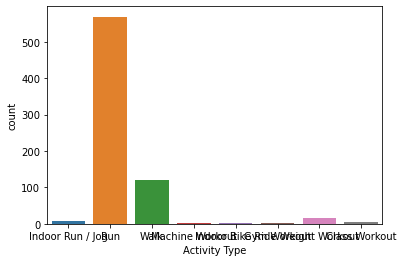

In [208]:
sns.countplot(x='Activity Type', data=data)

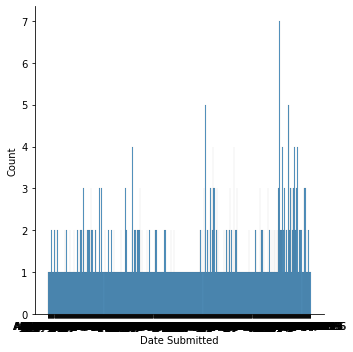

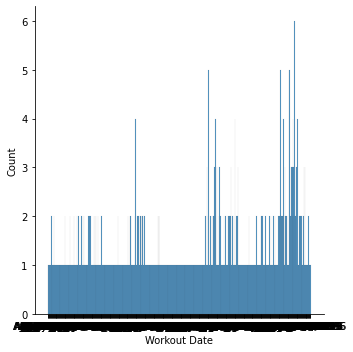

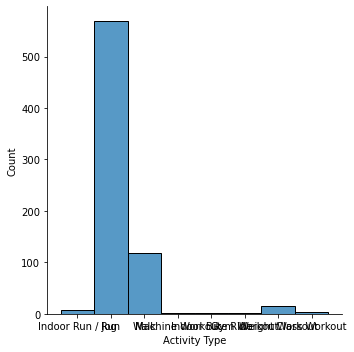

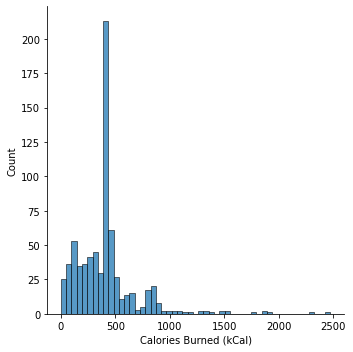

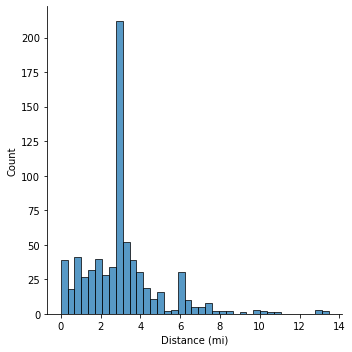

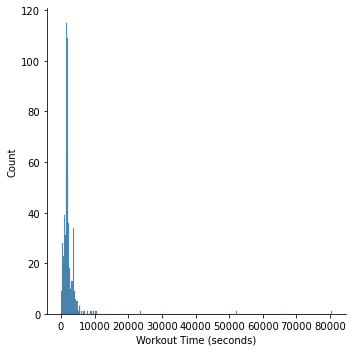

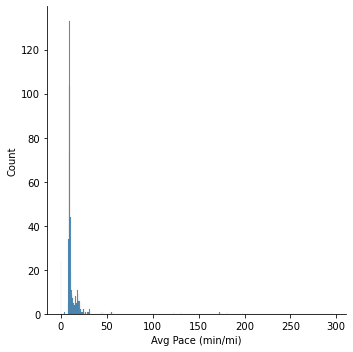

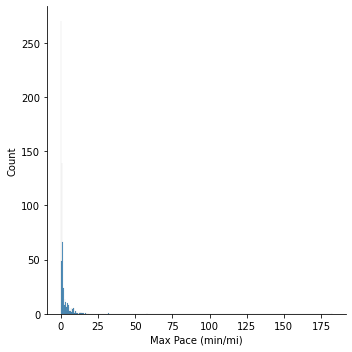

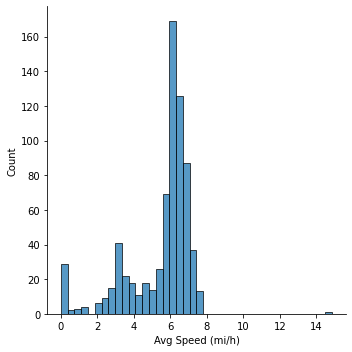

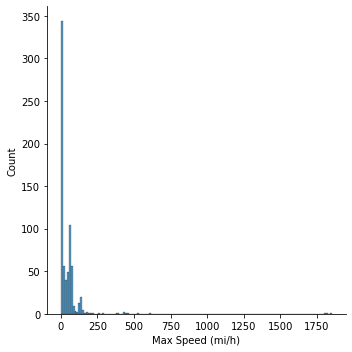

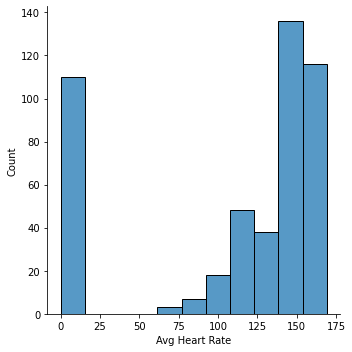

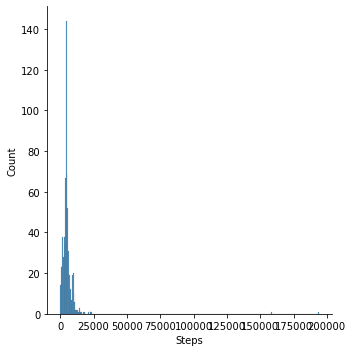

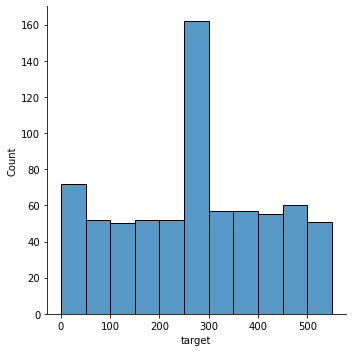

In [209]:
for column in data:
    sns.displot(x=column, data=data)

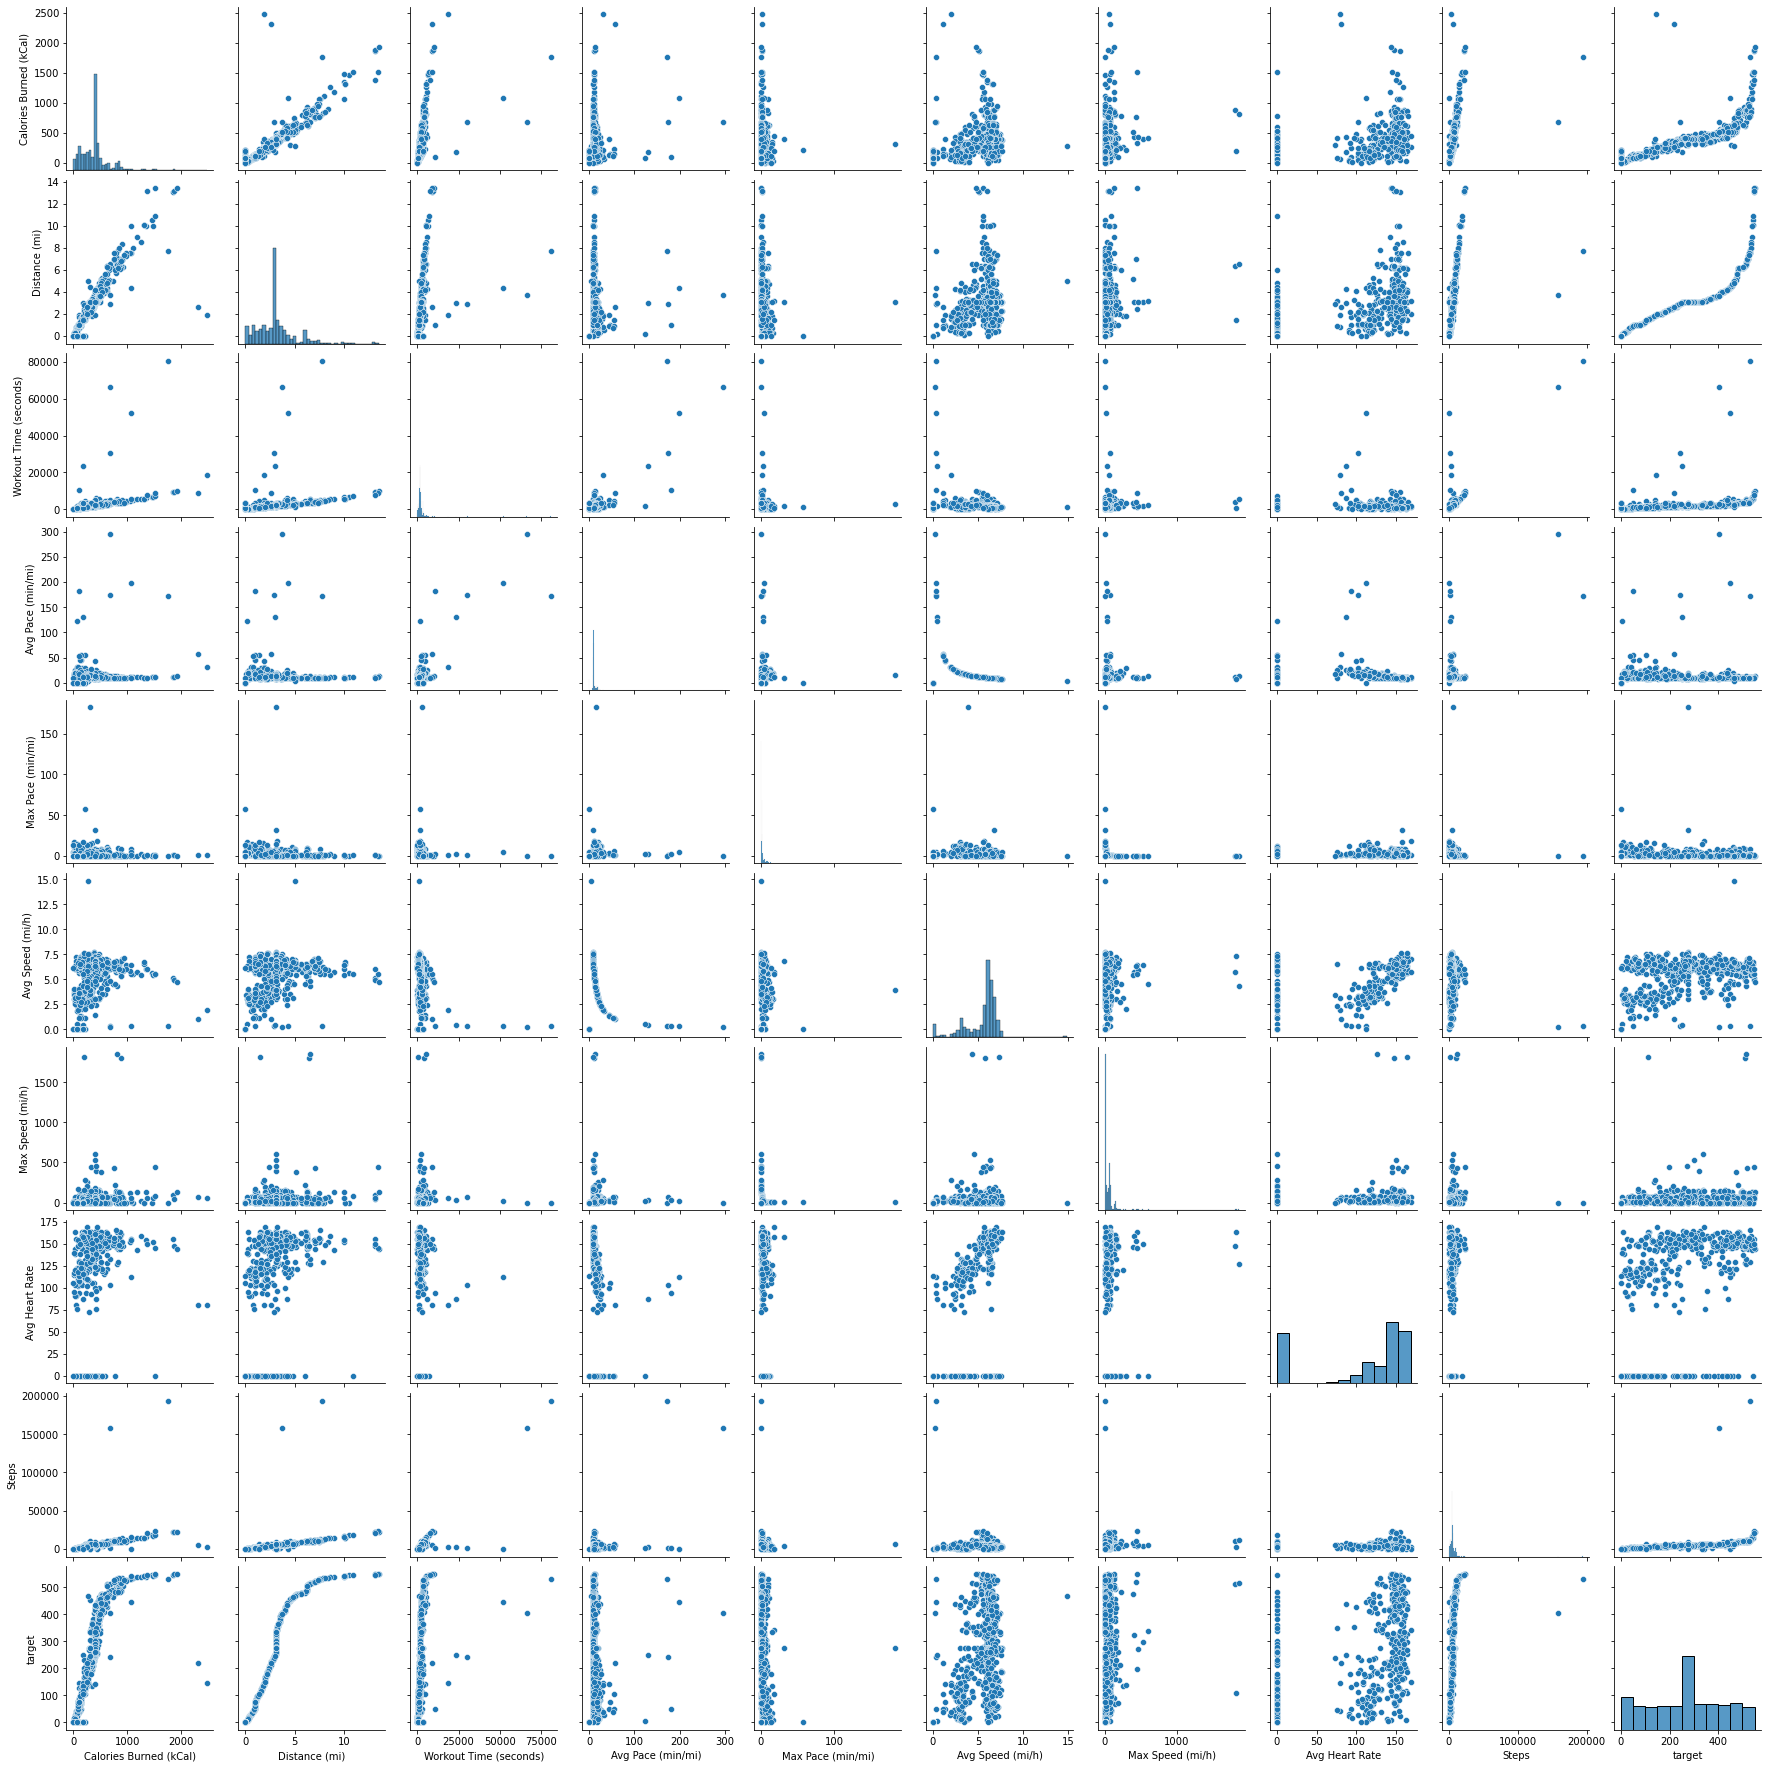

In [210]:
sns.pairplot(data)

c:\Users\coleb\mambaforge\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


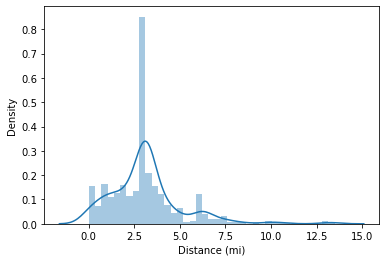

In [211]:
Distance_DP = sns.distplot(data['Distance (mi)'])

In [212]:
print("Skewness: %f" % data['Distance (mi)'].skew())

Skewness: 1.585490


In [213]:
#data['Distance (mi)'].round(0)
#data['Distance (mi)'] = data['Distance (mi)'].astype('int64')
data = data.replace(0, np.nan)
data = data.dropna(how='all', axis=0)
data = data.replace(np.nan, 0)
data.dropna(inplace=True)
data.head()

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace (min/mi),Avg Speed (mi/h),Max Speed (mi/h),Avg Heart Rate,Steps,target
0,"Aug. 15, 2022","Aug. 15, 2022",Indoor Run / Jog,632.0,4.74000,3600.0,12.65820,10.421800,4.74000,5.75715,122.0,8146.0,460.0
1,"Aug. 14, 2022","Aug. 14, 2022",Run,618.0,6.38464,4663.0,12.17350,8.817930,4.92875,6.80432,128.0,11001.0,511.0
2,"Aug. 12, 2022","Aug. 12, 2022",Indoor Run / Jog,831.0,6.21000,3617.0,9.70746,9.712310,6.18081,6.17773,144.0,9306.0,502.0
3,"Aug. 11, 2022","Aug. 11, 2022",Run,576.0,4.62746,3712.0,13.36610,1.546500,4.48896,38.79730,116.0,7878.0,458.0
4,"Aug. 10, 2022","Aug. 10, 2022",Run,863.0,7.02161,4441.0,10.53930,0.967622,5.69300,62.00770,144.0,11520.0,523.0


In [214]:
log_transformed = np.log(data['Distance (mi)'])
log_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)
log_transformed.dropna(inplace=True)

c:\Users\coleb\mambaforge\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


c:\Users\coleb\mambaforge\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


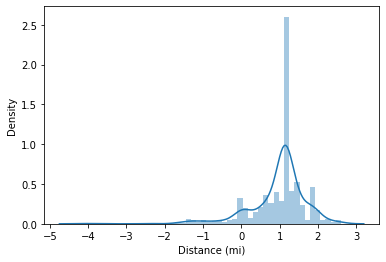

In [215]:
Dist_dpt = sns.distplot(log_transformed)

Text(0.5, 1.0, 'Total Missing Values')

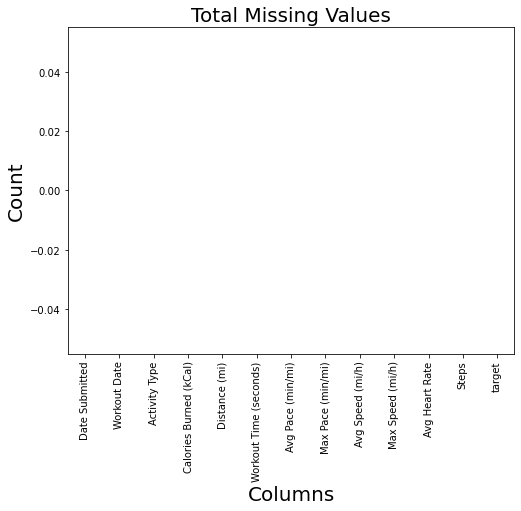

In [216]:
total = data.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [217]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)

In [218]:
norm_data = MinMaxScaler().fit_transform(newdf)
norm_data

array([[0.25556005, 0.35159032, 0.04468275, ..., 0.72189349, 0.04201438,
        0.83636364],
       [0.24989891, 0.47358177, 0.05787658, ..., 0.75739645, 0.05673953,
        0.92909091],
       [0.33602911, 0.46062782, 0.04489375, ..., 0.85207101, 0.04799728,
        0.91272727],
       ...,
       [0.07399919, 0.        , 0.04468275, ..., 0.        , 0.        ,
        0.        ],
       [0.07521229, 0.        , 0.04468275, ..., 0.        , 0.        ,
        0.        ],
       [0.07642539, 0.        , 0.04468275, ..., 0.        , 0.        ,
        0.        ]])

In [219]:
scaled_data = StandardScaler().fit_transform(newdf)
scaled_data

array([[ 0.80731664,  0.81028721,  0.25265871, ...,  0.69815208,
         0.28605974,  1.25508855],
       [ 0.75768773,  1.63781899,  0.48215898, ...,  0.78151122,
         0.58260922,  1.59390267],
       [ 1.51275616,  1.54994556,  0.25632898, ...,  1.00380225,
         0.4065492 ,  1.53411194],
       ...,
       [-0.78435342, -1.57473361,  0.25265871, ..., -0.99681706,
        -0.56006708, -1.80088192],
       [-0.77371866, -1.57473361,  0.25265871, ..., -0.99681706,
        -0.56006708, -1.80088192],
       [-0.76308389, -1.57473361,  0.25265871, ..., -0.99681706,
        -0.56006708, -1.80088192]])

In [220]:
#sns.pairplot(data)

(391, 13)

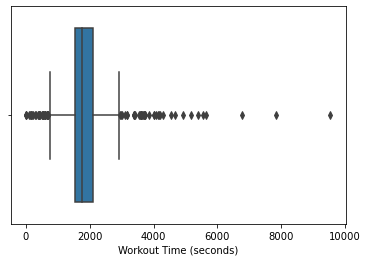

In [227]:
sns.boxplot(x=data['Workout Time (seconds)'])
data = data[data['Workout Time (seconds)'] < 12000]
data.loc[ data['Avg Heart Rate'] == 0 | np.isnan(data['Avg Heart Rate']), 'Avg Heart Rate' ] = data['Avg Heart Rate'].median()
data.loc[ data['Avg Speed (mi/h)'] == 0 | np.isnan(data['Avg Speed (mi/h)']), 'Avg Speed (mi/h)' ] = data['Avg Speed (mi/h)'].median()
data.loc[ data['Max Speed (mi/h)'] == 0 | np.isnan(data['Max Speed (mi/h)']), 'Max Speed (mi/h)' ] = data['Max Speed (mi/h)'].median()
data = data[data['Avg Speed (mi/h)'] < 13]
data = data[data['Max Speed (mi/h)'] < 55]
#data = data[data['Max Pace (min/mi)'] < 13]
data = data[data['Avg Pace (min/mi)'] < 13]
data.shape

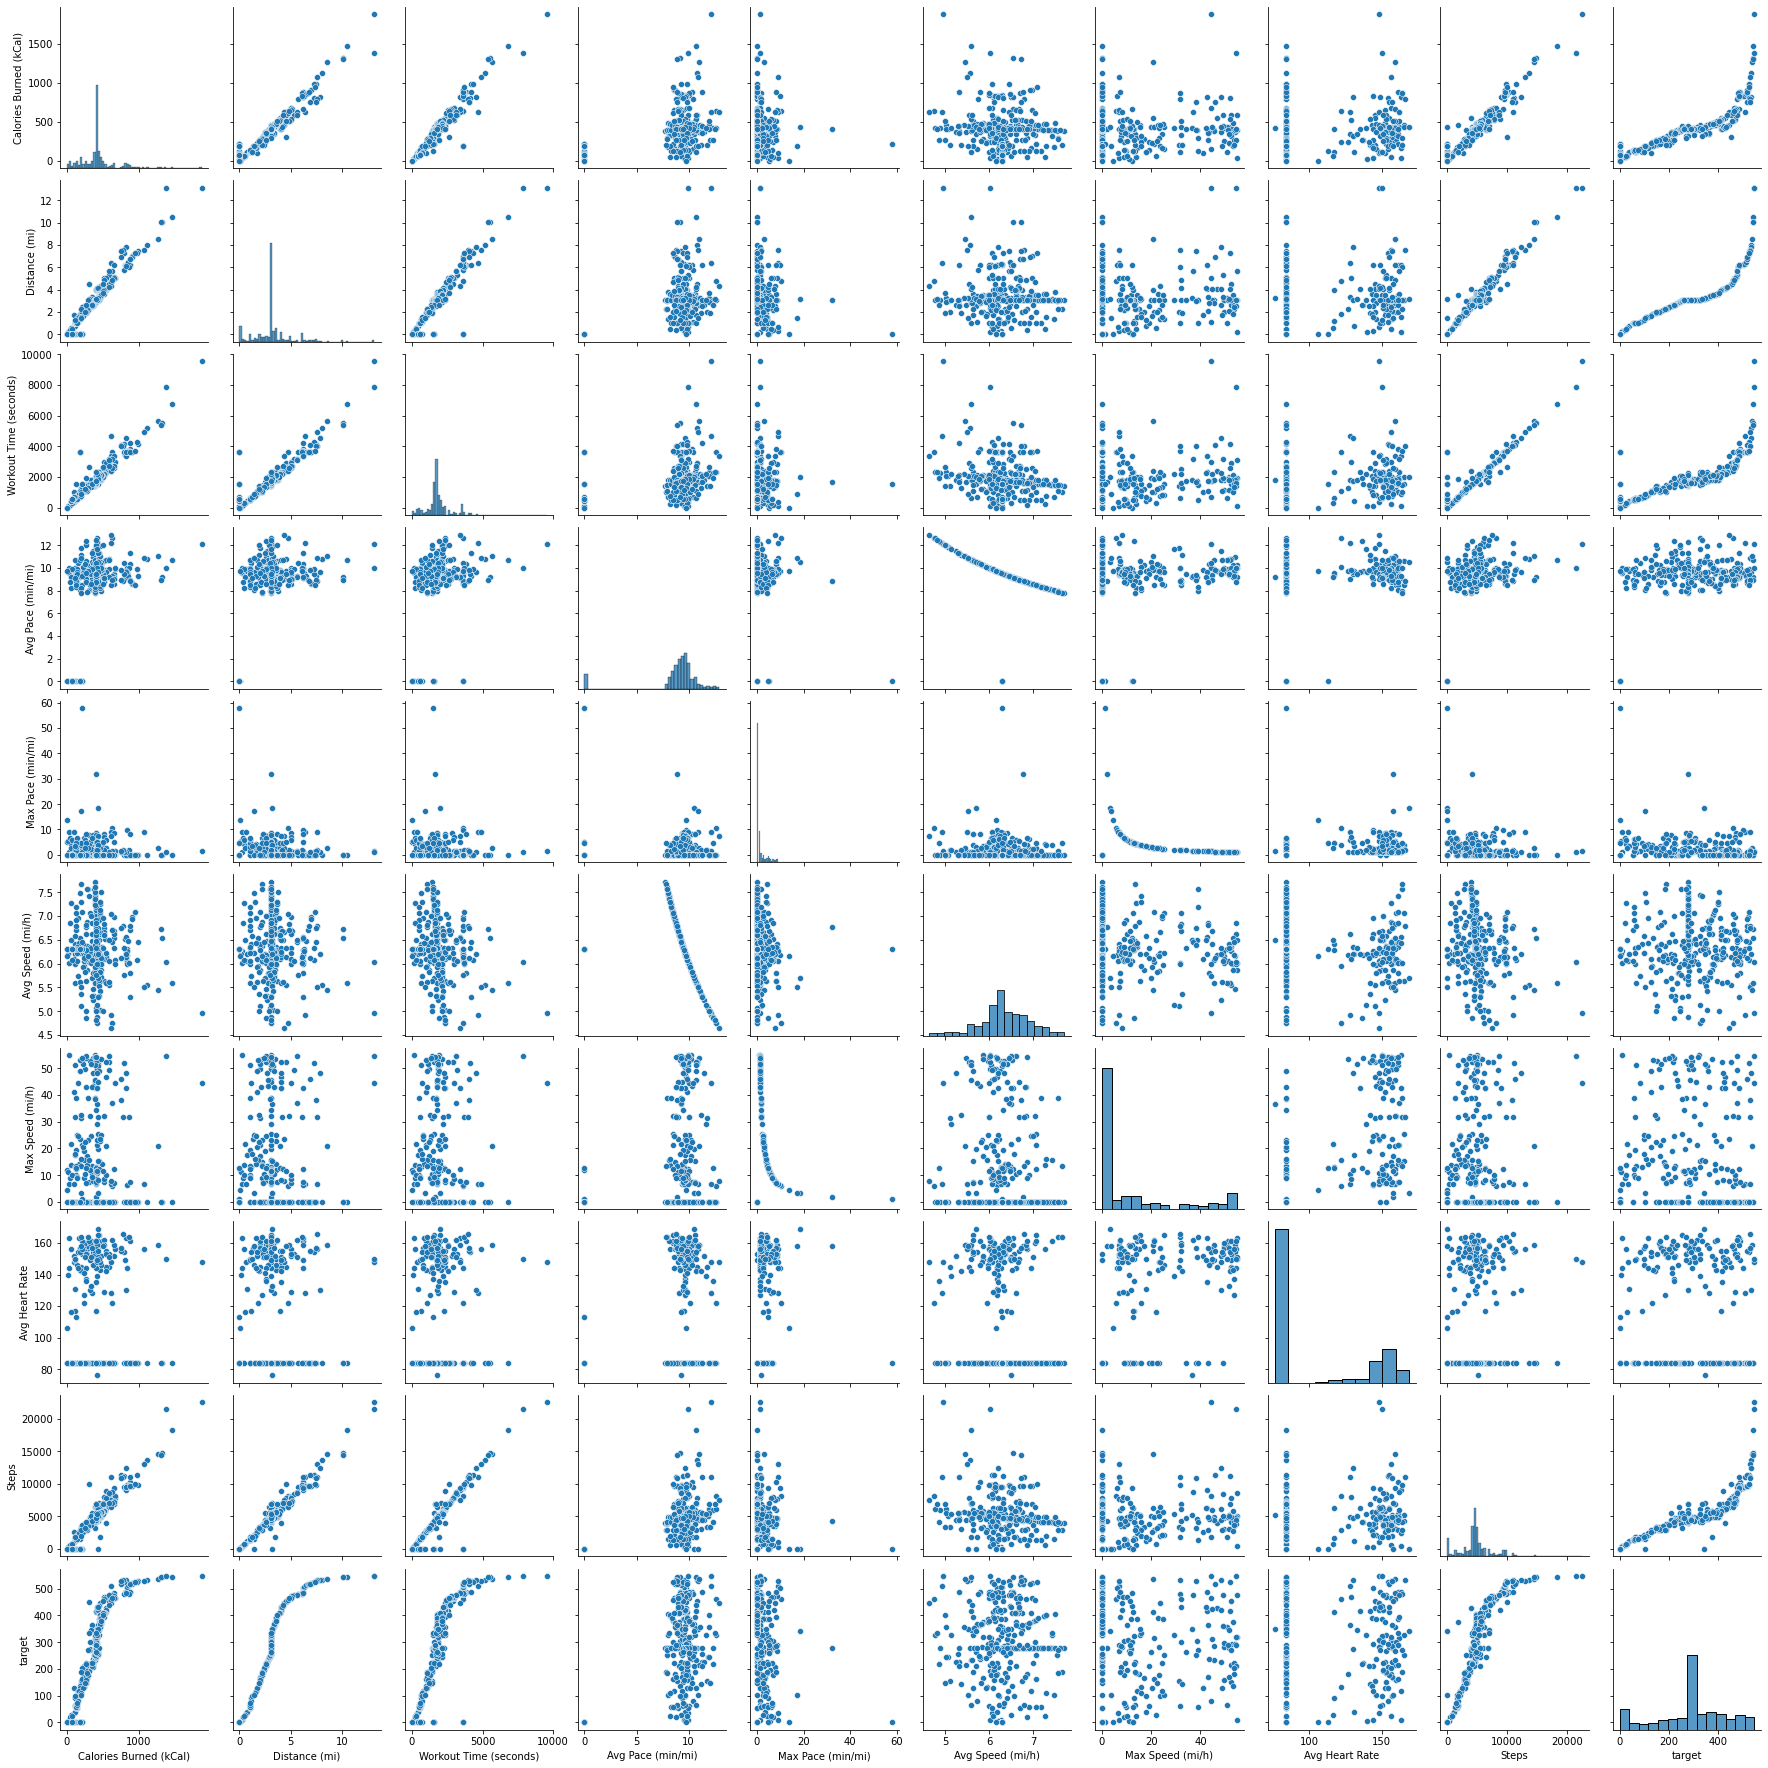

In [228]:
sns.pairplot(data)